In [1]:
library(rstan)
library(here)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


要求されたパッケージ StanHeaders をロード中です


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


here() starts at /media/e595/Game/プロジェクト置き場/RとStanで始めるベイズ統計モデリング



In [2]:
# 分析対象のデータ
file_beer_sales_1 <- read.csv(here("./data/2-4-1-beer-sales-1.csv"))


In [10]:
head(file_beer_sales_1)


,sales
,<dbl>
1,87.47
2,103.67
3,83.29
4,131.91
5,106.59
6,83.59


In [3]:
sample_size <- nrow(file_beer_sales_1)
data_list <- list(sales = file_beer_sales_1$sales, N = sample_size)


In [6]:
mcmc_result <- stan(
  file = here("2部", "2-4-1-calc-mean-variance.stan"),
  data = data_list,
  seed = 1,
  chains = 4,
  iter = 2000,
  warmup = 1000,
  thin = 1
)


In [7]:
print(mcmc_result, probs = c(0.025, 0.5, 0.9725))


Inference for Stan model: anon_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     50%  97.25% n_eff Rhat
mu     102.14    0.03 1.86   98.48  102.17  105.68  2817    1
sigma   18.18    0.02 1.29   15.89   18.10   20.91  3063    1
lp__  -336.45    0.02 1.00 -339.07 -336.15 -335.48  1687    1

Samples were drawn using NUTS(diag_e) at Sun Jul 14 18:24:20 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


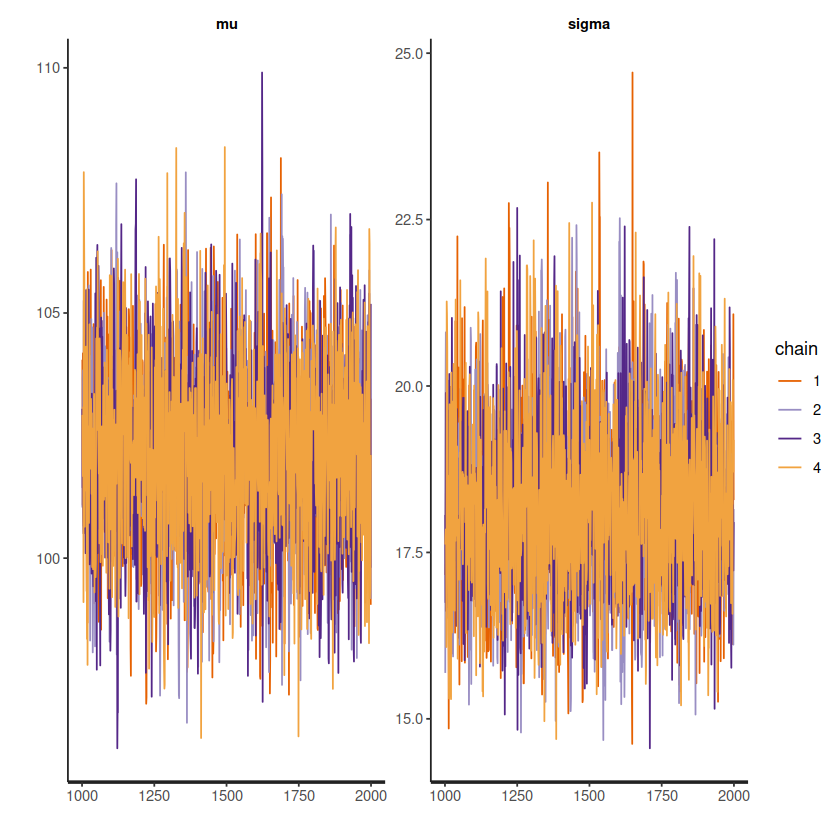

In [8]:
# バーンインなし
traceplot(mcmc_result)


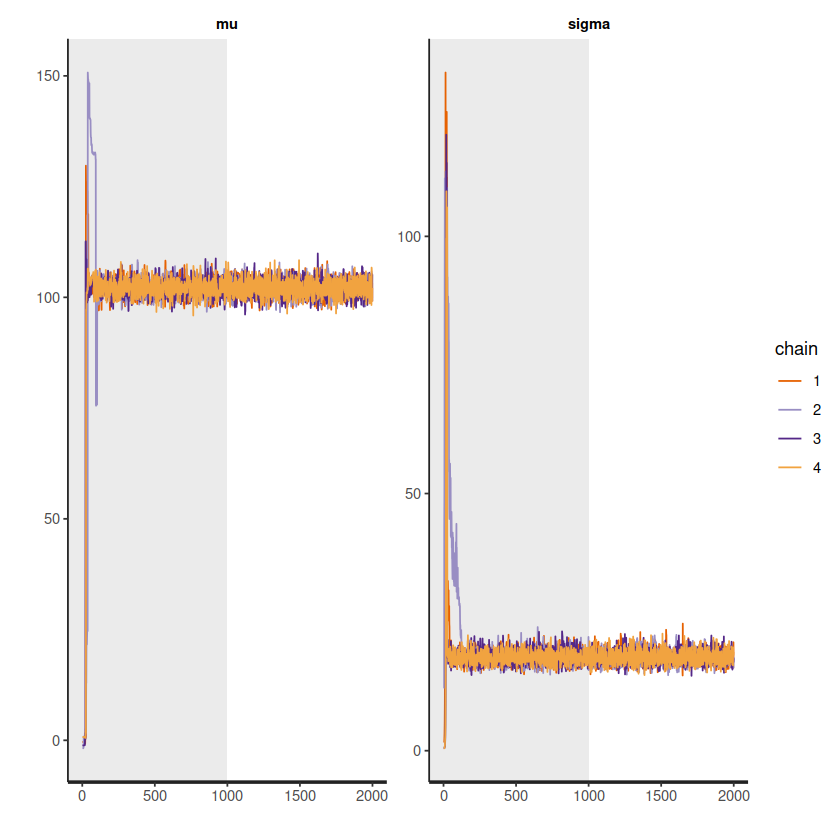

In [9]:
# バーンインあり
traceplot(mcmc_result, inc_warmup = T)
